#Mixture Models, and the EM algorithm

AM207: Pavlos Protopapas, Harvard University


------

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
from IPython.display import Image

$$\newcommand{\isum}{\sum_{i}}$$
$$\newcommand{\zsum}{\sum_{k=1}^{K}}$$
$$\newcommand{\zsumi}{\sum_{\{z_i\}}}$$

##Mixture models

It is common to assume that observations are correlated due to some common “cause”. Hierarchical bayesian models are an example where we assume that information flows between observations through a tied-together set of higher level hyper-parameters. 

We can also construct models with 'hidden' or 'augmented' variables, also known as latent variable models, which may or may not correlate with a cause. Since such models often have fewer parameters than observations, they are useful in modelling many problems.

An example of a hidden model is the mixture model. A distribution $p(x| {\theta_{k}})$ is a mixture of $K$ component distributions $p_1, p_2,... p_K$ if:

$$p(x| \{\theta_{k}\}) = \zsum \lambda_k p_{k}(x | \theta_k)$$

with the $\lambda_k$ being mixing weights, $\lambda_k > 0$, $\zsum \lambda_k = 1$.

The $p_k$'s can be completely arbitrary, but we usually assume they are from the same family, like Gaussians with different centers and variances, or Poissons with different means.

The way to generate a new observation from such a distribution thus would be the following:

$$Z \sim Mult(\lambda_1,\lambda_2,...,\lambda_K)$$

$$x | z  = p_k$$

where $Z$ says which component X is drawn from. Thus $\lambda_j$ is the probability that the hidden class variable Z is j, and we are setting a multinomial prior. 

Thus we can see the general structure above:

$$p(x | \theta) = \sum_z p(z)p(x | z, \theta)$$

where $\theta = \{ \theta_k \}$ is the collection of distribution parameters.

##Gaussian Mixture Models

The Gaussian mixture model or GMM is the most widely used mixture distribution. In this model, each base distribution  is a multivariate Gaussian with mean $\mu_k$ and covariance matrix $\Sigma_k$. Thus the model has the form

$$p(x| \{\theta_{k}\}) = \zsum \lambda_k N(x \vert \mu_k , \Sigma_k ) $$

Thus each mixture component is represented by a different set of eliptical contours, and we add these to create our overall density.

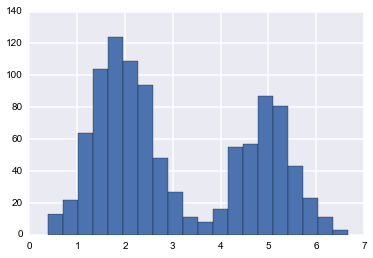

In [3]:
#In 1-D
# True parameter values
mu_true = [2, 5]
sigma_true = [0.6, 0.6]
lambda_true = .4
n = 1000

# Simulate from each distribution according to mixing proportion psi
z = np.random.binomial(1, lambda_true, n)
x = np.array([np.random.normal(mu_true[i], sigma_true[i]) for i in z])

plt.hist(x, bins=20);

###Supervised learning: Gaussian Discriminant Analysis

In supervised learning, we have some training data of $N$ samples, each with $m$ features, which we use to train a "generative" or "discriminative" classifier. 

For a feature vector x, we use Bayes rule to express the posterior of the class-conditional as:

$$p(z = c|x, \theta) = \frac{p(z = c | \theta)p(x | z = c, \theta)}{ \sum_{c′} p(z = c′ | \theta) p(x | z = c′, \theta)}$$

This is a generative classifier, since it specifies how to generate the data using the class-conditional density $p(x|z = c, \theta)$ and the class prior $p(z = c\vert \theta)$. 

An alternative approach is to directly fit the class posterior, $p(z = c|x, \theta)$; this is known as a discriminative classifier. For example, Naive bayes is a generative classifier whose discriminative counterpart is the logistic regression.

In the context of the mixture model, the supervised learning case is the one in which where hidden variables $z$ are known. 

Suppose we have input data 
$x$ are continuous-valued random variables, and $z$ labels.  We can use 
maximum likelihood approach that models the **full-data** likelihood $p(x,z | \theta)$ using a multivariate normal distribution. The model is

$$ z \sim \rm{Bernoulli}(\lambda) $$
$$ x|z=0 \sim {\cal N}(\mu_0, \Sigma_0) $$
$$ x|z=1 \sim {\cal N}(\mu_1, \Sigma_1) $$

The distributions in details are
$$ p(z) = \lambda^z (1-\lambda)^{1-z}$$
$$ p(x|z=0) = \frac{1}{(2\pi)^{n/2} | \Sigma|^{1/2}} \exp \left( -\frac{1}{2}(x-\mu_0)^T \,\Sigma^{-1}(x-\mu_0) \right) $$
$$ p(x|z=1) = \frac{1}{(2\pi)^{n/2} | \Sigma|^{1/2}} \exp \left( -\frac{1}{2}(x-\mu_1)^T \,\Sigma^{-1}(x-\mu_1) \right) $$


where the parameters of the model $\lambda$, $\Sigma$, $\mu_0$ and $\mu_1$ are to be determined. 
Note for simplicity of exposition we use one covariance matrix for both Gaussians. 
The log-likelihood of the data is given 

\begin{eqnarray}
 l(x,z| \lambda,\mu_0, \mu_1, \Sigma) &=& \log \prod_{i=1}^{m} p(x_i,z_i| \lambda, \mu_0, \mu_1, \Sigma) \nonumber \\ 
          &=& \sum_{i=1}^{m} \log \left[p(x_i|z_i,  \mu_0, \mu_1, \Sigma) \,p(z_i| \lambda) \right]  \nonumber \\ 
          &=& \sum_{i=1}^{m} \log p(x_i|z_i,  \mu_0, \mu_1, \Sigma) + \sum_{i=1}^{m}  \log p(z_i| \lambda)   \nonumber   \\      
	&=&  -\sum_{i=1}^{m} \log ((2\pi)^{n/2} | \Sigma|^{1/2}) - \frac{1}{2} \sum_{i=1}^{m}  (x-\mu_{z_i})^T \,\Sigma^{-1}(x-\mu_{z_i})   \nonumber \\ 
		& & \quad \quad +\sum_{i=1}^{m} \left[ z_i \, \log \lambda + (1-z_i) \log(1-\lambda) \right]
\end{eqnarray}



Taking derivatives with respect to  $\lambda$, $\Sigma$, $\mu_0$ and $\mu_1$ and setting them to zero we get 
\begin{eqnarray}
   \lambda & = &\frac{1}{m}  \sum_{i=1}^{m}  \delta_{z_i,1} \nonumber  \\ 
   \mu_0 &=& \frac{ \sum_{i=1}^{m}  \delta_{z_i,0} \, x_i  }{ \sum_{i=1}^{m}   \delta_{z_i,0}}\nonumber  \\ 
    \mu_1 &=& \frac{ \sum_{i=1}^{m}  \delta_{z_i,1} \, x_i  }{ \sum_{i=1}^{m}   \delta_{z_i,1}}\nonumber  \\ 
 \Sigma &=&\frac{1}{m}   \sum_{i=1}^{m}  (x_i-\mu_{z_i})   (x_i-\mu_{z_i})^{T} 
\end{eqnarray}

This gives us the obvious result, namely $\lambda$ is nothing more but the fraction of objects with label $z=1$ and the total 
number of objects, $\mu$'s are the mean within the class and $\Sigma$ is the the covariance matrix 
for each group. This analysis is called "Gaussian Discriminant Analysis" or GDA.


In [4]:
#the z's are the classes in the supervised learning
#the 'feature' is the x position of the sample
from sklearn.cross_validation import train_test_split
ztrain, ztest, xtrain, xtest = train_test_split(z,x)

In [5]:
ztrain.shape, xtrain.shape

((750,), (750,))

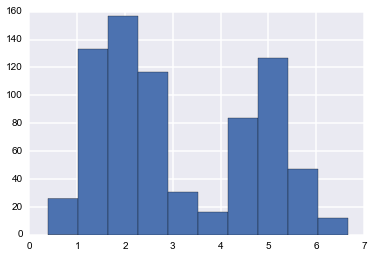

In [6]:
plt.hist(xtrain);

In [7]:
lambda_train=np.mean(ztrain)
mu0_train = np.sum(xtrain[ztrain==0])/(np.sum(ztrain==0))
mu1_train = np.sum(xtrain[ztrain==1])/(np.sum(ztrain==1))
xmus=np.array([mu0_train if z==0 else mu1_train for z in ztrain])
xdiffs = xtrain - xmus
sigma_train=np.sqrt(np.dot(xdiffs, xdiffs)/xtrain.shape[0])
print lambda_train, mu0_train, mu1_train, sigma_train

0.381333333333 1.94677064511 4.99478438709 0.603091813476


We can use the log likelihood at a given `x` as a classifier: assign the class '0' or '1' depending upon which probability $p(x_j|\lambda, \mu_0,\mu_1,\Sigma)$ is larger. The first term of the likelihood does not matter since is independent of $z$, therefore:

In [8]:
def loglikdiff(x):
    for0= - (x-mu0_train)*(x-mu0_train)/(2.0*sigma_train*sigma_train) 
    for0 = for0 + np.log(1.-lambda_train)
    for1 = - (x-mu1_train)*(x-mu1_train)/(2.0*sigma_train*sigma_train) 
    for1 = for1 + np.log(lambda_train)
    return 1*(for1 - for0 >= 0)

In [9]:
pred = np.array([loglikdiff(test_x) for test_x in xtest])
print "correct classification rate", np.mean(ztest == pred)

correct classification rate 1.0


### Unsupervised learning: Mixture of Gaussians 

In unsupervised learning, we do not know the class labels. We wish to generate these labels automatically from the data. An example of an unsupervised model is clustering.  In the context of mixture models we do not know what the components of the mixture model are, i.e. what the parameters of the components and their admixture ($\lambda$s) are. Indeed, we might not even know how many components we have!!

In this case, to carry out the clustering, we first fit the mixture model, and then compute $p(z_i = k | x_i, \theta)$, which represents the posterior probability that point i belongs to cluster k. This is known as the responsibility of cluster k for point i, and can be computed as before using Bayes rule as follows:

$$p(z_k = c|x_i, \theta) = \frac{p(z_k = c | \theta)p(x_i | z_k = c, \theta)}
{ \sum_{_c′} p(z_k = c′ | \theta) p(x_i | z_k = c′, \theta)}$$

This is called soft clustering.

The process is identical to the computations performed before in the supervised learning, except at training time: here we never observe $z_k$ for any samples, whereas before with the generative GDA classifier, we did observe $z_k$ on the training set.

How many clusters? The best number will generalize best to future data, something we can use cross-validation or other techniques to find.

###Concretely formulating the problem

So let us turn our attention to the case where we do not know the labels $z$. 

Suppose we are given a data set $\{x_1,\ldots, x_m\}$ but not given the labels $z$. The model consists of 
$k$ Gaussians. In other words our model assumes that each $x_i$ was generated by randomly choosing 
$z_i$ from $\{1, \ldots, k\}$, and then $x_i$ is drawn from one of the $k$ Gaussians depending on 
$z_i$. 

We wish to compute either the maximum likelihood estimate or the MAP estimate for this model, $p(\{x_{i}\} \vert \theta)$ or $p(\theta | \{x_{i}\})$.
The goal is to model the joint distribution $p(\{x_i\}, \{z_i\})=p(\{x_i\}|\{z_i\}) \, p(\{z_i\})$ where $z_i \sim \rm{Multinomial}(\lambda)$, and $\lambda = \{\lambda_j\}$.

As in our definition of mixture models $\lambda_j\ge0$  and 

$$ \sum_j^k \lambda_i = 1 $$

The parameters $\lambda_j$  produce $p(z_i=j)$ or $x_i|z_i=j \sim {\cal N}(\mu_j, \Sigma_j)$.

The parameters of our problem are $\lambda$, $\mu$ and $\Sigma$. We can estimate them 
by minimizing the log-likelihood 
\begin{eqnarray}
l(x| \lambda, \mu, \Sigma) &=& \sum_{i=1}^{m} \log p(x_i| \lambda,  \mu ,\Sigma)   \nonumber \\ 
     &=& \sum_{i=1}^{m} \log \zsum p(x_i| z_i,  \mu , \Sigma) \, p(z_i| \lambda_i)  
\end{eqnarray} 

However, if we set to zero the derivatives of this formula with respect to
the parameters and try to solve, we'll find that it is not possible to find the
maximum likelihood estimates of the parameters in closed form. (Try it !!!)

The variables $z_i$'s tells us which of the $k$ Gaussians $x_i$ are from. 
Of course if we knew $z$, then we have the supervised learning problem we solved above. We might think we could use regular optimization to find the MLE or MAP estimate, but we have a problem. We have to enforce constraints such as mixing weights summing to 1, covariance matrices being positive definite, etc. 

For all of these reasons, its simpler, but not always faster to use an iterative algorithm called the EM algorithm to get the local maximum likelihood or MAP estimate. 

## The EM algorithm

** Expectation-maximization (EM)** method is this iterative method for maximizing difficult 
likelihood (or posterior) problems. It was first introduced by Dempster, Laird, and Rubin (1977). 

EM recognizes that if the data were fully observed, then  ML/ MAP estimates would be easy to compute. It thus alternates between inferring the missing values given the parameters (E step), and then optimizing the parameters given the “filled in” data (M step). 
The idea is to find a lower-bound 
on the log-likelihood $\ell$ (E-step) and the optimize the lower-bound (M-step). 

TODO: connection to data augmentation

Suppose we have an estimation problem in which we have data consising of $m$ independent examples $\{x_1,\ldots,x_m\}$ . 
The goal is to fit the parameters of the model, where the log-likelihood is given by 
\begin{eqnarray}
\ell(x | \theta)&=& \log \prod_{i=1}^{m} p(x_i| \theta) =   \sum_{i=1}^{m} \log \,p(x_i| \theta)  \\ 
   &=& \sum_{i=1}^{m} \log \zsumi \,p(x_i,z| \theta)  \\ 
\end{eqnarray}

where the $z$ are the latent random variables. If $z$ were observed then the maximum likelihood estimation would be easy. 

Indeed then, let us start with the full data log-likelihood, 

$$\ell(x, z | \theta) = \sum_{i=1}^{m}  \log \,p(x_i, z_i | \theta),$$

 which is the log-likelihood we'd calculate if we knew all the $z_i$. But we do not know thse, so lets assume the $\{z_i\}$ have some normalized distribution $q(z)$, and calculate the expected value of the full data log likelihood with respect to this distribution:


\begin{eqnarray}
\mathrm{E_q[\ell( x,z | \theta)]}  &=& \sum_i \zsumi q_{i}(z_i) \log \,p(x_i, z_i | \theta)\\
    &=& \sum_i \zsumi q_{i}(z_i) \log \,\frac{p(x_i, z_i | \theta)}{q_{i}(z_i)} +  \sum_i \zsumi q_{i}(z_i) \log \,q_{i}(z_i)
\end{eqnarray}

The second term only involves $q$ and is independent of $\theta$. Looking only at the first term inside the i-summation:

\begin{eqnarray}
\mathcal{L}(i, q, \theta) &=&  \zsumi q_{i}(z_i) \log \,\frac{p(x_i, z_i | \theta)}{q_{i}(z_i)} \\
&=& \zsumi  q_i(z_i) \left( \log \frac{p(z_i| x_i,  \theta)}{ q_i(z_i)} + \log p(x_i | \theta)\right)
\end{eqnarray}

we can see that, since $\zsumi q_i(z_i) = 1$:

\begin{eqnarray}
\mathcal{L}(i, q, \theta) &=& \zsumi  q_i(z_i) \left( \log \frac{p(z_i| x_i,  \theta)}{ q_i(z_i)} + \log p(x_i | \theta)\right)\\
    &=& -\mathrm{KL}\left(q_i || p_i \right) + \log p(x_i | \theta)\\
\end{eqnarray}

where $\mathrm{KL}$ is the Kullback-Leibler divergence between $q(x)$ and the hidden variable posterior distribution $p(z|x,\theta)$.

Since the sum over the data-points of the second term is just the log-likelihood we desire, it can then can be written as:

\begin{eqnarray}
\ell(x | \theta) &=& \sum_i \left(\mathcal{L}(i, q, \theta) +\mathrm{KL}\left(q_i  || p_i \right)\right)\\
&=& \mathcal{L}(q, \theta) + \mathrm{KL}\left(q || p \right)
\end{eqnarray}

where we are defining:

$$\mathrm{KL}(q || p) = \sum_i \mathrm{KL}\left(q_i  || p_i \right)$$

as the sum of the KL-divergence at each data point, and $\mathcal{L}(q, \theta)$ as the sum of $\mathcal{L}$ at each data point.

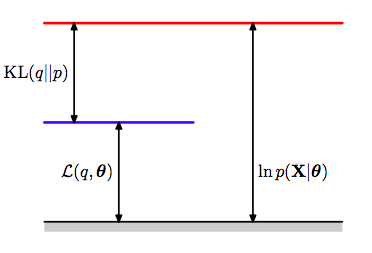

In [10]:
Image("./klsplitup.png")

Now recall from your statistics or Machine-learning class (or see the appendix
below), that the Kullback Liebler divergence at each $x_i$ is 0 only if the distributions as a function of $z$ are the same; it is otherwise **ALWAYS** greater than 0. This tells us that the quantity $\mathcal{L}(q, \theta)$ (which is the expected value of the full-data log-likelihood minus the entropy of $q$), is **ALWAYS** smaller than or equal to the log-likelihood of $p(x | \theta)$, as illustrated above. In other words, $\mathcal{L}(q, \theta)$ is a lower bound on the log-likelihood.

This observation sets up the EM algorithm for us. If we choose, in the **E-step**, at some value of the parameters $\theta_{old}$,

$$q(z) = p(z | x, \theta_{old}),$$ 

at each point $x_i$, we then set set the Kullback Liebler divergence to 0, and thus $\mathcal{L}(q, \theta)$ to the log-likelihood at $\theta_{old}$,  and maximizing the lower bound. Indeed, one can think of this process as one of maximizing $\mathcal{L}(q, \theta)$ with respect to the function $q$. This is a functional maximization (physicists will have seen this in the calculus of variations which goes into Lagrangian formulation of mechanics and path integrals), and is the basis for an entire subfield of Bayesian inference called Variational Inference.

The E stands for “expectation”, because it gives us the conditional probabilities of different values of Z, and probabilities are expectations of indicator functions. The E-step is illustrated below.

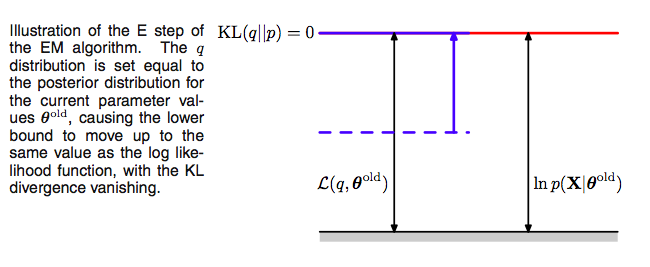

In [11]:
Image("./klsplitestep.png")

Now the **M-step**. Since after the E-step, the lower bound touches the log-likelihood, any maximization of this lower bound from its current value with respect to $\theta$ will also “push up” on the function itself. Thus M step guaranteedly modifies the parameters $\theta$ to increase (or keep same) the likelihood of the observed data.

Thus we hold now the distribution $q(z)$ fixed at the hidden variable posterior calculated at $\theta_{old}$, and maximize $\mathcal{L}(q, \theta)$ with respect to $\theta$ to obtain new parameter values $\theta_{new}$. This is a regular maximization.

The distribution $q$, calculated as it is at $\theta_{old}$ will not equal the new posterior distribution $p(z|x,\theta_{new})$, and hence there will be a nonzero KL divergence. Thus the increase in the log-likelihood will be greater than the increase in the lower bound $\mathcal{L}$, as illustrated below.

The M in “M-step” and “EM” stands for “maximization”.

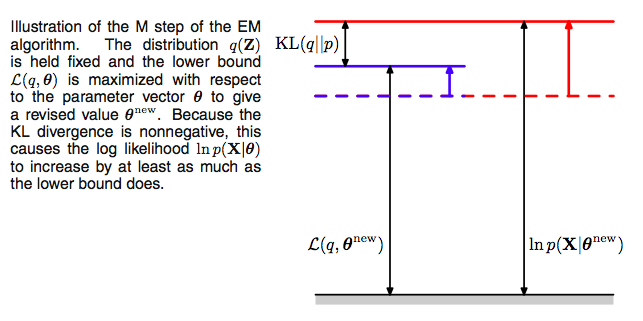

In [12]:
Image("./klsplitmstep.png")

Note that since $\mathcal{L}$ is maximized with respect to $\theta$, one can equivalently maximize the expectation of the full-data log likelihood $\mathrm{E_q[\ell( x,z | \theta)]}$ in the M-step since the difference is purely a function of $q$. Furthermore, if the joint distribution $p(x, z| \theta)$ is a member of the exponential family, the log-likelihood will have a particularly simple form and will lead to a much simpler maximization than that of the incomple-data log-likelihood $p(x|\theta)$.

We now set $\theta_{old} = \theta_{new}$ and repeat the process. This **EM algorithm** is presented and  illustrated below:

1. We start with the log-likelihood $p(x | \theta)$(red curve) and the initial guess $\theta_{old}$ of the parameter values
2. Until convergence (the $\theta$ values dont change too much):
    1. E-step: Evaluate the hidden variable posterior $q(z, \theta_{old}) = p(z | x, \theta_{old})$ which gives rise to a lower bound function of $\theta$: $\mathcal{L}(q(z, \theta_{old}), \theta)$(blue curve) whose value equals the value of $p(x | \theta) at $\theta_{old}.
    2. M-step: maximize the lower bound function with respect to $\theta$ to get $\theta_{new}$.
    3. Set $\theta_{old} = \theta_{new}$
    
One iteration more is illustrated below, where the subsequent E-step constructs a new lower-bound function that is tangential to the log-likelihood at $\theta_{new}$, and whose value at $\theta_{new}$ is higher than the lower bound at $\theta_{old}$ from the previous step.

Thus

$$\ell(\theta_{t+1}) \ge \mathcal{L}(q(z,\theta_t), \theta_{t+1}) \ge \mathcal{L}(q(z,\theta_t), \theta_{t}) = \ell(\theta_t)$$

The first equality follows since $\mathcal{L}$ is a lower bound on $\ell$, the second from the M-step's mazimization of $\mathcal{L}$, and the last from the vanishing of the KL-divergence after the E-step. As a consequence, you **must** observe monotonic increase of the observed-data log likelihood $\ell$ across iterations. This is a  powerful debugging tool for your code.

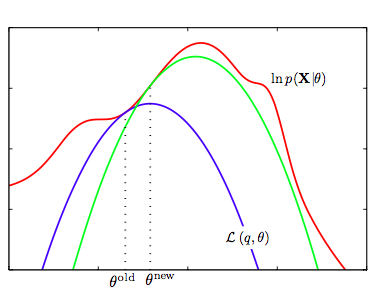

In [13]:
Image("./emupdate.png")

Note that as shown above, since each EM iteration can only improve the likelihood, you are guaranteeing convergence to a local maximum. Because it **IS** local (why?), you must try some different initial values of $\theta_{old}$ and take the one that gives you the largest $\ell$.

## The Gaussian Mixture model using EM

The EM algorithm comes to the rescue. As described above here is the algorithm:


* Repeat until convergence 
*  E-step: For each $i,j$ calculate 

$$ w_{i,j} = q_i(z_i=j)=p(z_i=j| x_i, \lambda, \mu, \Sigma) $$
     
* M-step: We need to maximize, with respect to our parameters the
  
\begin{eqnarray}
 \mathcal{L} &=& \sum_i \sum_{z_i} q_i(z_i) \log \frac{p(x_i,z_i |\lambda, \mu, \Sigma)}{q_i(z_i)} \nonumber \\
 \mathcal{L} &=& \sum_i \sum_{j=i}^{k}  q_i(z_i=j) \log \frac{p(x_i|z_i=j , \mu, \Sigma) p(z_i=j|\lambda)}{q_i(z_i=j)} \\
 \mathcal{L} & =&  \sum_{i=1}^{m} \sum_{j=i}^{k} w_{i,j}  \log \left[   \frac{ \frac{1}{ (2\pi)^{n/2}|\Sigma_j|^{1/2}} \exp \left(    -\frac{1}{2}(x_i-\mu_j)^T \Sigma_j^{-1} (x_i-\mu_j) \right)  \, \lambda_j   }{w_{i,j}}\right]
\end{eqnarray}

Taking the derivatives yields the following updating formulas:

\begin{eqnarray}
 \lambda_j &=& \frac{1}{m} \sum_{i=1}^m w_{i,j} \nonumber \\ 
 \mu_j&=& \frac{ \sum_{i=1}^m  w_{i,j} \, x_i}{ \sum_{i=1}^m  w_{i,j}} \nonumber \\ 
 \Sigma_j &=& \frac{ \sum_{i=1}^m  w_{i,j} \, (x_i-\mu_j)(x_i-\mu_j)^T}{ \sum_{i=1}^m  w_{i,j}}
\end{eqnarray}

To calculate the E-step we basically calculating the posterior of the  $z$'s given the $x$'s and the
current estimate of our parameters. We can use Bayes rule 

$$ w_{i,j}= p(z_i=j| x_i, \lambda, \mu, \Sigma) = \frac{p( x_i| z_i=j,  \mu, \Sigma)\, p(z_i=j|\lambda)}{\sum_{l=1}^k p(x_i | z_i=l,  \mu, \Sigma) \, p(z_i=l|\lambda)} $$

Where $p(x_i | z_i =j,  \mu, \Sigma)$ is the density of the Gaussian with mean $\mu_j$ and covariance 
$\Sigma_j$ at $x_i$ and $p(z_i=j| \lambda)$ is simply $\lambda_j$. 
If we to compare these formulas in the M-step with the ones we found in GDA we can see
that are very similar except that instead of using $\delta$ functions we use the $w$'s. Thus the EM algorithm corresponds here to a weighted maximum likelihood and the weights are interpreted as the `probability' of coming from that Gaussian instead of the deterministic 
$\delta$ functions.

In [36]:
#from Bios366 lecture notes
from scipy.stats.distributions import norm

def Estep(x, mu, sigma, lam):
    a = lam * norm.pdf(x, mu[0], sigma[0])
    b = (1. - lam) * norm.pdf(x, mu[1], sigma[1])
    return b / (a + b)



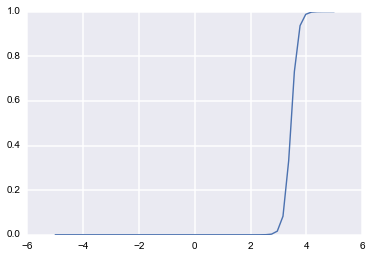

In [37]:
xrng = np.linspace(-5,5)
plt.plot(xrng, Estep(xrng, mu_true, sigma_true, lambda_true))

In [38]:
def Mstep(x, w):
    lam = np.mean(1.-w) 
    
    mu = [np.sum((1-w) * x)/np.sum(1-w), np.sum(w * x)/np.sum(w)]
    
    sigma = [np.sqrt(np.sum((1-w) * (x - mu[0])**2)/np.sum(1-w)), 
             np.sqrt(np.sum(w * (x - mu[1])**2)/np.sum(w))]
    
    return mu, sigma, lam

In [45]:
print lambda_true, mu_true, sigma_true
# Initialize values
mu = np.random.normal(4, 10, size=2)
sigma = np.random.uniform(0, 5, size=2)
lam = np.random.random()

# Stopping criterion
crit = 1e-15

# Convergence flag
converged = False

# Loop until converged
iterations=1


while not converged:
    # E-step
    if np.isnan(mu[0]) or np.isnan(mu[1]) or np.isnan(sigma[0]) or np.isnan(sigma[1]):
        print "Singularity!"
        break
        
    w = Estep(x, mu, sigma, lam)

    # M-step
    mu_new, sigma_new, lam_new = Mstep(x, w)
    
    # Check convergence
    converged = ((np.abs(lam_new - lam) < crit) 
                 & np.all(np.abs((np.array(mu_new) - np.array(mu)) < crit))
                 & np.all(np.abs((np.array(sigma_new) - np.array(sigma)) < crit)))
    mu, sigma, lam = mu_new, sigma_new, lam_new
    iterations +=1           

print "Iterations", iterations
print('A: N({0:.4f}, {1:.4f})\nB: N({2:.4f}, {3:.4f})\nlam: {4:.4f}'.format(
                        mu_new[0], sigma_new[0], mu_new[1], sigma_new[1], lam_new))

0.4 [2, 5] [0.6, 0.6]
Iterations 55
A: N(4.9819, 0.5655)
B: N(1.9365, 0.6055)
lam: 0.3838


### Old Faithful

In [19]:
ofdata=pd.read_csv("./oldfaithful.csv")
ofdata.head()

/Users/pavlos/anaconda/lib/python2.7/site-packages/pandas/core/config.py:570: DeprecationWarning: height has been deprecated.

  warnings.warn(d.msg, DeprecationWarning)
/Users/pavlos/anaconda/lib/python2.7/site-packages/pandas/core/config.py:570: DeprecationWarning: height has been deprecated.

  warnings.warn(d.msg, DeprecationWarning)


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


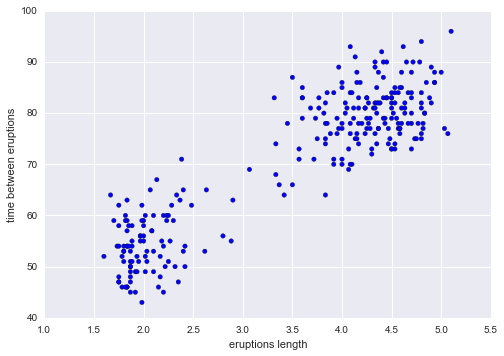

In [21]:
plt.scatter(ofdata.eruptions, ofdata.waiting);
plt.xlabel('eruptions length')
plt.ylabel('time between eruptions')

In [22]:
from sklearn import mixture
clf = mixture.GMM(n_components=2)
clf.fit(ofdata.values)



GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=0.01)

In [25]:
mask = clf.predict(ofdata.values)

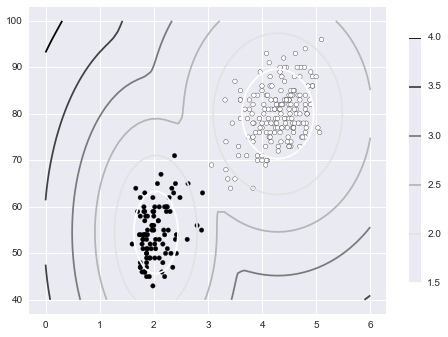

In [37]:
xx = np.linspace(0, 6) 
yy = np.linspace(40, 100) 
X, Y = np.meshgrid(xx, yy)
XX = np.c_[X.ravel(), Y.ravel()]
Z =  np.log(-clf.score_samples(XX)[0])
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(ofdata.eruptions, ofdata.waiting, c=mask);

##Why is EM important?

We have motivated the EM algorithm using mixture models, but that is not its only place of use. 

Since MLE's can overfit, we often prefer to use MAP estimation. EM is a perfectly reasonable method for MAP estimation in mixture models; you just need to multiply in the prior.

Basically the EM algorithm has a similar setup to the data augmentation problem and can be used in any problem which has a similar structure. Suppose for example you have two parameters $\phi$ and $\gamma$ in a posterior estimation, with daya $y$. Say that we'd like to estimate the posterior $p(\phi | y)$. It may be relatively hard to estimate this, but suppose we can  work with $p(\phi | \gamma, y)$ and $p(\gamma | \phi, y)$. Then you can use the structure of the EM algorithm to estimate the marginal posterior of any one parameter. Start with:

$$log p(\phi | y) = log p(\gamma, \phi | y) - log p(\gamma | \phi, y)$$

Notice the similarity of this to the above expressions with $\phi$ as $x$, $y$ as $\theta$, and $\gamma$ as $z$. Thus the same derivations apply toany problem with this structure.

This structure can also be used in type-2 likelihood or emprical bayes estimation (See Casella 2001) of hyperparameters in hierarchical models. The structure there is identical to the gibbs sampler for the hierarchical model (which has a structure identical to the data augmentation setup). See the hierarchical example in the Gibbs Sampler lecture for an example. How would you estimate $\alpha$ and $\beta$ there using empirical bayes, rather than the full Gibbs sampler for $\{\theta_k\}$, $\alpha$, and $\beta$?

##Appendices

###Appendix 1: Jensen's Inequality

Let $f$ be a function with domain the set of real numbers. If the second derivative is greater than zero 
for all $x\in R$ this function is convex\footnote{In the case of vector inputs this is called positive 
semi-definite}. 

**Theorem**. Let $f$ be a convex function, and $X$ be a random variable, then

$$ E[f(X)] \ge f(E[X]) $$ 

Furthermore, if $f$ is stricly convex (i.e. $f''(x)>0$), then $E[f(x)]=f(E[X])$ only if $X=E[X]$ with
probability 1 ($X$ is constant).  

To see this lets first take the case of two random variables $x_1$ and $x_2$.


**Defnition 1** Let f be a real valued function defined on an interval $I = [a, b]$.
$f$ is said to be convex on I if $\forall x_1, x_2 \in I, \lambda \in [0, 1]$,

\begin{equation}
f(\lambda x_1 + (1 - \lambda)\,x_2) \le \lambda f(x_1) + (1- \lambda)\,f(x_2).
\end{equation}

$f$ is said to be strictly convex if the inequality is strict. Intuitively, this definition
states that the function falls below  the
straight line (the secant) from points $(x_1, f(x_1))$ to $(x_2, f(x_2))$. In other words, the equality is satisfied only for $\lambda = 0$ and $\lambda = 1$.

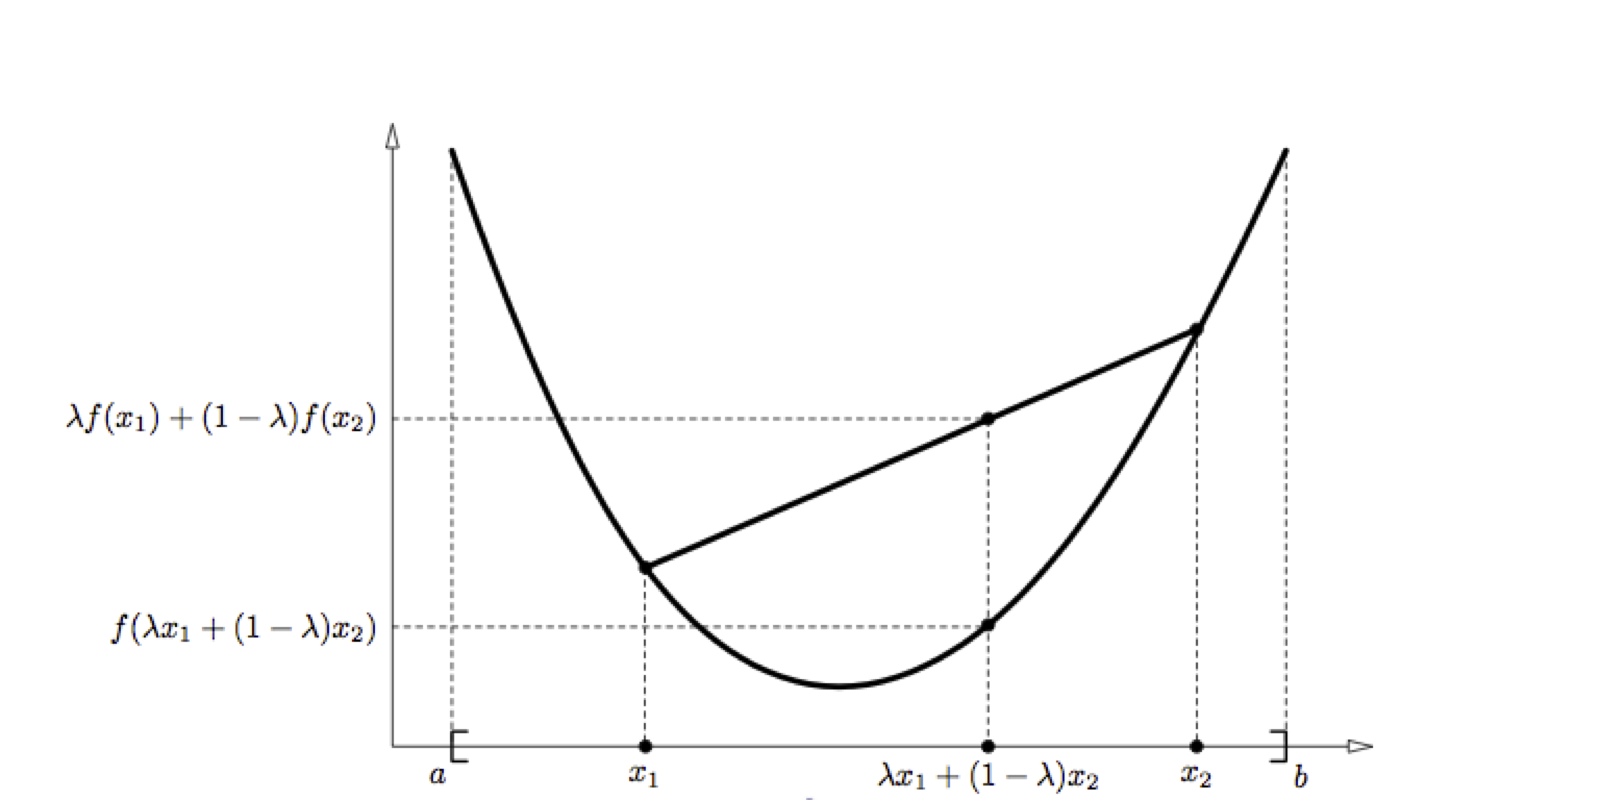

In [2]:
from IPython.display import Image
Image("EM1.png")

**Jensen's inequality** Let $f$ be a convex function defined on an interval $I$. 
If $x_1,x_2,\dots,x_n \in I {\rm and} \lambda_1, \lambda_2,\ldots,\lambda_n \ge  0$ with $\sum^n_{i=1} \lambda_i = 1$,

\begin{equation}
f \left( \sum_{i=1}^n \lambda_i \,  x_i \right) \le  \sum_{i=1}^n \lambda_i f(x_i) 
\end{equation}

**Proof:**	For $n = 1$ this is trivial. The case $n = 2$ corresponds to the definition of convexity (see above). 
To show that this is true for all natural numbers, we proceed by induction. Assume the theorem is true for some $n$ then,

\begin{eqnarray}
f \left( \sum_{i=1}^{n+1} \lambda_i \,  x_i \right) &=& f\left( \lambda_{n+1} x_{n+1} + \sum_{i=1}^n \lambda_i \,  x_i  \right) \nonumber \\
		&=&  f\left( \lambda_{n+1} x_{n+1} + \frac{(1-\lambda_{n+1})}{(1-\lambda_{n+1})}\sum_{i=1}^n \lambda_i \,  x_i  \right) \nonumber \\
		& \le & \lambda_{n+1} f(x_{n+1}) + (1-\lambda_{n+1}) f \left( \frac{1}{(1-\lambda_{n+1})} \sum_{i=1}^n \lambda_i \,  x_i  \right) \nonumber \\
		& = & \lambda_{n+1} f(x_{n+1}) + (1-\lambda_{n+1}) f \left( \sum_{i=1}^n \frac{\lambda_i}{(1-\lambda_{n+1})} \,  x_i  \right)  \nonumber \\
		& \le & \lambda_{n+1} f(x_{n+1}) + (1-\lambda_{n+1})  \sum_{i=1}^n \frac{\lambda_i}{(1-\lambda_{n+1})} \,  f(x_i)  \nonumber \\ 
		& =&  \lambda_{n+1} f(x_{n+1}) + \sum_{i=1}^n \lambda_i f(x_i) \nonumber \\ 
		& =&  \sum_{i=1}^{n+1}  \lambda_i f(x_i)
\end{eqnarray}

By interpreting the $\lambda_i$ as the probability distribution over a discrete variable $x$ taking the values $\{x_i\}$:

$$f(\mathrm{E}[x]) \le \mathrm{E}[f(x)]$$

 

### Appendix 2: The Kullback-Liebler divergence. (taken from Bishop)

Consider some unknown distribution $q(x)$, and suppose that we have modelled this using an approximating distribution $p(x)$. The average additional amount of information required to specify the value of $x$  as a result of using $q(x)$ instead of the true distribution $p(x)$ is given by

\begin{eqnarray}
\mathrm{KL}(q || p) &=& -\sum_{x} q(x) \log p(x)  - \left(-\sum_x p(x) \log p(x) \right)\\
    &=& \sum_x q(x) \log \frac{q(x)}{p(x)}
\end{eqnarray}

￼This is known as the relative entropy or Kullback-Leibler divergence, or $\mathrm{KL}$-divergence (Kullback and Leibler, 1951), between the distributions $p(x$) and $q(x)$. Note that it is not a symmetrical quantity.

We can use Jensen's inequality on a convex function $f(x)$:

 to show that $\mathrm{KL}(q || p) \ge 0$ with equality iff $p=q$.

$$\mathrm{KL}(q || p) = - \sum_x q(x) \log \frac{p(x)}{q(x)} \ge \log \left( \sum_x p(x) \right) = 0$$

where we have used the fact that $-log(x)$ is a convex function, and that $p(x)$ normalizes to a distribution. Infact, since $=\log(x)$ is strictly convex, the equality only happens if $p(x) = q(x)$ for ALL x.

Thus we can interpret the Kullback-Leibler divergence as a measure of the dissimilarity of the two distributions p(x) and q(x). In Bayesian statistics the KL divergence can be used as a measure of the information gain in moving from a prior to posterior, and common goal in Bayesian experimental design is to maximise the expected KL divergence between the prior and the posterior. The divergence is also used to understand mutual information in clustering. It is also used in variational bayesian inference.